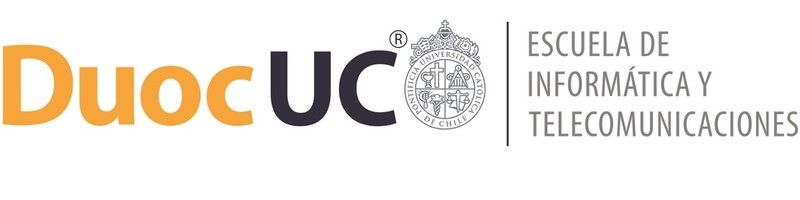

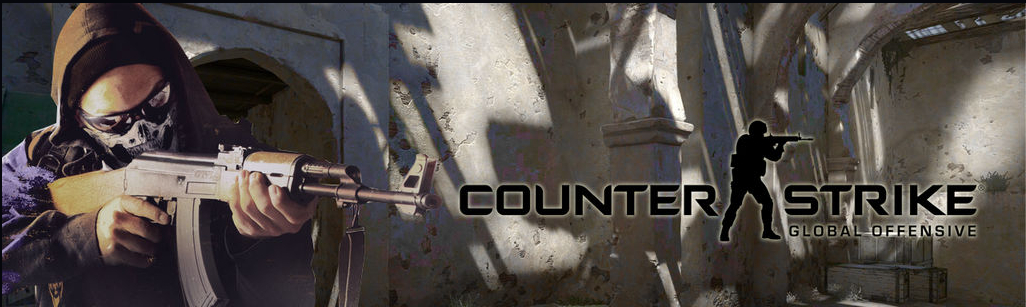

# Informe Técnico - Examen Transversal: Caso Counter Strike


Integrantes: Álvaro Flores, Aurora Mansilla, Ricardo Ojeda

Docente: Giocrisrai Godoy    

Sección: MLY0100 - 002D

# Caso Fundamentos de Machine Learning

CONTEXTO CASO

Valve, los ha contactado como equipo de análisis de datos y modelado de Machine Learning para analizar y realizar modelos predictivos sobre los datos.

En cada partida de Counter Strike: GO dos equipos de 5 jugadores (denominados terroristas y contra-terroristas) se enfrentan.


El objetivo del equipo terrorista es plantar una bomba con timer de 45 segundos en uno de dos sitios específicos dentro de un mapa. Por otro lado, el objetivo del equipo contra-terrorista es evitar que la bomba sea plantada o desactivarla antes de que esta explote cuando ya ha sido plantada. Los datos a utilizar corresponden a sobre 7000 partidas del juego (con un máximo de 10 jugadores c/u)  


Los datos han sido extraídos de replays, los cuales son archivos propietarios con la información de cada una de las acciones realizadas por cada jugador dentro de una partida. Los replays han sido extraídos de la red utilizando un scrapper y pre-procesados utilizando un script.  



En este caso, la data corresponde a un archivo CSV con 79.157 filas, cada una correspondiente a un jugador dentro de una partida. El archivo contiene 29 columnas correspondientes a variables que describen las acciones del jugador dentro del juego.


$$
\begin{aligned}
&\begin{array}{cccc}
\hline \hline \text { Dato } & \text { Descripción } \\
\hline Map & \text {Nombre  del Mapa donde se jugó la partida}  \\
\hline \text{ Team} & \text { Nombre de equipo al que pertenece el jugador} \\
\hline \text{ InternalTeamId} & \text { Identificador del equipo al que pertenece el jugador.} \\
\hline \text{ MatchId} & \text { Identificador de la partida.} \\
\hline \text{ RoundId} & \text { Identificador de la ronda (los equipos se enfrentan en rondas de 5 partidas seguidas)} \\
\hline \text{ MatchWinner} & \text { Indica si el jugador ganó o no la partida.} \\
\hline \text{ RoundWinner} & \text { Indica si el jugador ganó o no la ronda analizada.} \\
\hline \text{ Survived} & \text { Indica si el jugador sobrevivió o no a la partida (sobrevivir no es sinónimo de ganar).} \\
\hline \text{ AbnormalMatch} & \text { Indica si la partida del jugador tuvo un error por conexión de red} \\
\hline \text{ TimeAlive} & \text { Indica el tiempo en segundos que el jugador estuvo vivo durante el juego} \\
\hline \text{ TravelledDistance} & \text { Distancia viajada por el jugador durante la partida.} \\
\hline \text{ RLethalGrenadesThrown/RNonLethalGrenadesThrown} & \text { Cantidad de granadas lanzadas, categorizadas en letales y no-letales.} \\
\hline \text{ PrimaryXXXX} & \text { Porcentaje de uso arma clasificada como primaria. Categorizada en AssaultRifle, SniperRifle, SMG, Heavy y Pistol.} \\
\hline \text{ [Match|Round] Assists} & \text { Cantidad de asistencias efectuadas por el jugador durante la partida o la ronda.} \\
\hline \text{ [Match|Round] Kills} & \text { Cantidad de kills efectuados por el jugador durante la partida o la ronda.} \\
\hline \text{ [Match|Round] FlankKills} & \text { Cantidad de kills efectuados por el jugador sin que la víctima lo viese durante la partida o la ronda.} \\
\hline \text{ [Match|Round] HeadShots} & \text { Cantidad de kills efectuados por el jugador a través de un tiro en la cabeza durante la partida o la ronda.} \\
\hline \text{ RoundStartingEquipmentValue} & \text { Valor del equipamiento llevado por el jugador al inicio de la ronda.} \\
\hline \text{ TeamStartingEquipmentValue} & \text { Valor promedio del equipamiento llevado por el equipo del jugador al inicio de la ronda.} \\
\end{array}
\end{aligned}
$$

## Fase 1: Business Understanding

In [ ]:
# Insertar cuantos bloques de código y markdown consideren necesarios

# Se recomienda investigar sobre el contexto de negocio, sobre los datos, uso de
# los campos en estadísticas de juegos, ver en qué se relacionan los contenidos
# revisados en la asignatura con lo planteado como caso de estudio.
# Plantear hipótesis del negocio posibles para objetivos de tareas de regresión y de clasificación

## Objetivo del proyecto

El objetivo de este proyecto es analizar los datos de las partidas del videojuego Counter Strike: GO con el fin de afirmar o descartar las hipótesis planteadas a continuación.

# Hipótesis

H1: A mayor valor de equipamiento inicial , mayor será el tiempo que un jugador sobrevive . Esto se va a extraer del tiempo de vida de los jugadores durante las partidas (regresión).


H2: El tipo de arma principal se relaciona con el tiempo de vida del jugador. Se hará un conteo de la probabilidad de supervivencia clasificando por el tipo de arma, así se realizará la comparación entre datos (clasificación).


## Fase 2: Data Understanding

In [ ]:
# Insertar cuantos bloques de código consideren necesarios

# Se recomienda obtener estadísticos descriptivos para apoyar hipótesis inferenciales.
# Reconocer la naturaleza de los datos y como tratarlos en etapas posteriores y dar ideas de como se podría transformar.
# Identificar MissingValues, outliers, medidas de posición, medidas de dispersión etc.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb


In [ ]:
from google.colab import files
import pandas as pd

uploaded = files.upload()

for fn in uploaded.keys():
    name = fn

# Leer el CSV usando punto y coma como separador
df = pd.read_csv(name, sep=";")


Saving Anexo ET_demo_round_traces_2022.csv to Anexo ET_demo_round_traces_2022.csv


/tmp/ipython-input-2-1079170611.py:10: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(name, sep=";")


In [ ]:
df.shape

(79157, 30)

In [ ]:
df.columns

Index(['Unnamed: 0', 'Map', 'Team', 'InternalTeamId', 'MatchId', 'RoundId',
       'RoundWinner', 'MatchWinner', 'Survived', 'AbnormalMatch', 'TimeAlive',
       'TravelledDistance', 'RLethalGrenadesThrown',
       'RNonLethalGrenadesThrown', 'PrimaryAssaultRifle', 'PrimarySniperRifle',
       'PrimaryHeavy', 'PrimarySMG', 'PrimaryPistol', 'FirstKillTime',
       'RoundKills', 'RoundAssists', 'RoundHeadshots', 'RoundFlankKills',
       'RoundStartingEquipmentValue', 'TeamStartingEquipmentValue',
       'MatchKills', 'MatchFlankKills', 'MatchAssists', 'MatchHeadshots'],
      dtype='object')

In [ ]:
df.head()

,Unnamed: 0,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,...,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
0,600,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,750,4400,0,0,0,0
1,601,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,800,4400,0,0,0,0
2,602,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,1000,4400,0,0,0,0
3,603,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,850,4400,0,0,0,0
4,604,de_inferno,Terrorist,1,4,1,False,True,True,False,...,0,0,0,0,1000,4400,0,0,0,0


In [ ]:
df.describe()

,Unnamed: 0,InternalTeamId,MatchId,RoundId,RLethalGrenadesThrown,RNonLethalGrenadesThrown,PrimaryAssaultRifle,PrimarySniperRifle,PrimaryHeavy,PrimarySMG,...,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
count,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,...,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000
mean,60570.193640,1.500006,250.525033,12.765517,0.498667,1.258057,0.675363,0.089840,0.005964,0.007046,...,0.671349,0.146178,0.301553,0.095633,3778.108695,18890.133532,8.511578,1.209912,1.874831,3.858484
std,36436.598386,0.500003,149.557804,7.432837,0.597985,1.184909,0.464125,0.279797,0.075497,0.082453,...,0.881798,0.385601,0.578843,0.320641,2111.285406,9743.203024,6.195079,1.435150,1.824027,3.246752
min,600.000000,1.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30830.000000,1.000000,128.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1600.000000,10900.000000,3.000000,0.000000,0.000000,1.000000
50%,56720.000000,2.000000,236.000000,12.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,4700.000000,22550.000000,8.000000,1.000000,1.000000,3.000000
75%,90639.000000,2.000000,373.000000,19.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,5200.000000,26050.000000,13.000000,2.000000,3.000000,6.000000
max,123779.000000,2.000000,511.000000,36.000000,4.000000,6.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,4.000000,5.000000,5.000000,8850.000000,36150.000000,41.000000,11.000000,14.000000,22.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Empty DataFrame


In [ ]:
# Ver si hay valores nulos
df.isnull().sum()


,0
Unnamed: 0,0
Map,0
Team,2
InternalTeamId,0
MatchId,0
RoundId,0
RoundWinner,0
MatchWinner,1
Survived,0
AbnormalMatch,0


El siguiente gráfico representa cuales han sido los mapas más populares según la cantidad de veces jugados, según la altura de la barra se puede ver el nivel de popularidad. De_inferno es el más popular.

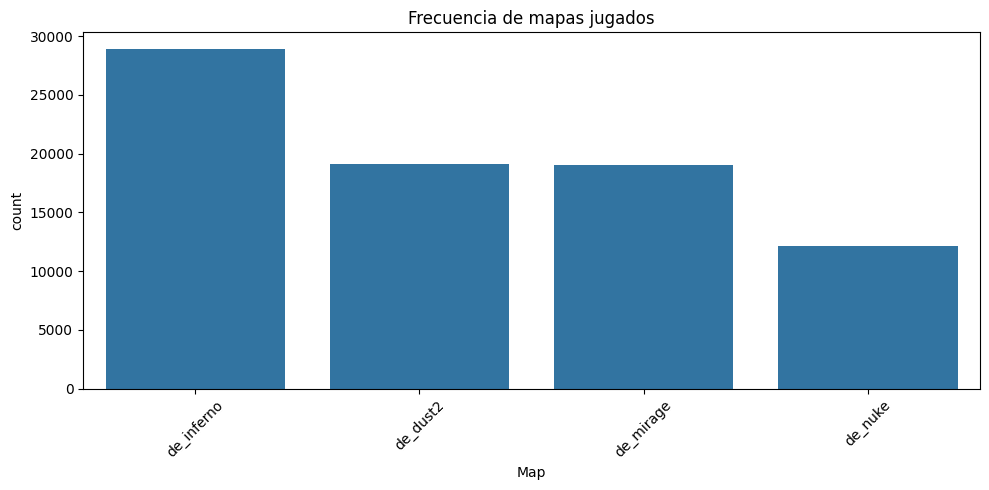

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Map', order=df['Map'].value_counts().index)
plt.title('Frecuencia de mapas jugados')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


En este gráfico se puede visualizar la cantidad de jugadores sobrevivientes y los que no. La mayoría no sobrevivió.

Survived
False    47214
True     31943
Name: count, dtype: int64


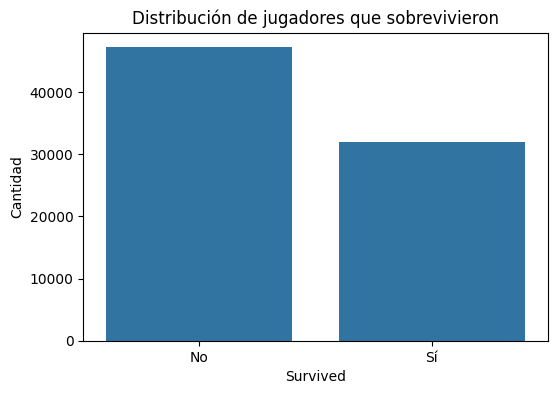

In [ ]:
sobrevivientes = df['Survived'].value_counts()
print(sobrevivientes)

plt.figure(figsize=(6,4))
sns.barplot(x=sobrevivientes.index, y=sobrevivientes.values)
plt.title('Distribución de jugadores que sobrevivieron')
plt.xticks([0,1], ['No', 'Sí'])
plt.ylabel('Cantidad')
plt.show()


En promedio ambos equipos tuvieron un rendimiento similar en kills, según se observa en el gráfico.

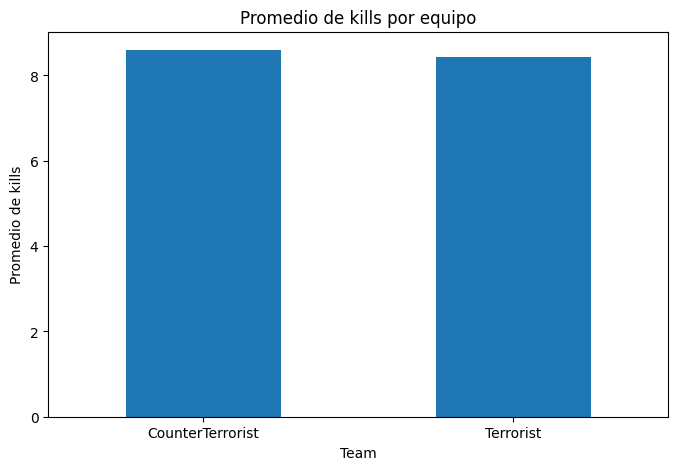

In [ ]:
df.groupby('Team')['MatchKills'].mean().plot(kind='bar', title='Promedio de kills por equipo', figsize=(8,5))
plt.ylabel('Promedio de kills')
plt.xticks(rotation=0)
plt.show()


Como se visualiza en el gráfico de barras, se extraen datos de TimeAlive y el tipo de arma utilizada. En base a la segregación según el tipo de arma se calculó el promedio de tiempo de vida entre los jugadores que eligieron dicho equipamiento.

<ipython-input-27-fde937bb4f1b>:3: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Anexo ET_demo_round_traces_2022.csv', sep=';')
<ipython-input-27-fde937bb4f1b>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['WeaponType'] = df_filtrado[['PrimaryAssaultRifle', 'PrimarySniperRifle', 'PrimaryHeavy', 'PrimarySMG', 'PrimaryPistol']].idxmax(axis=1)


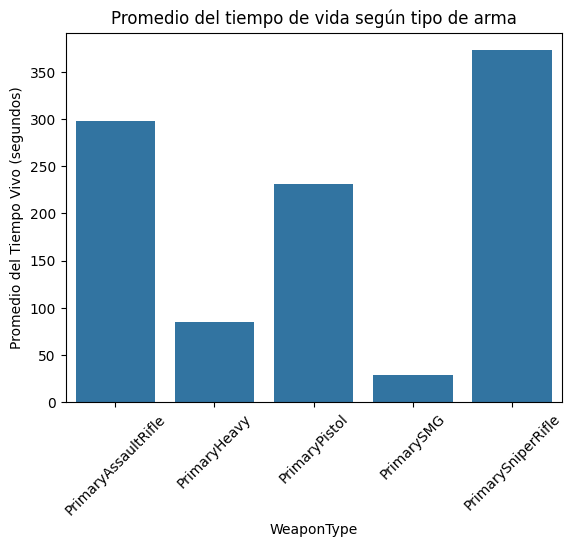

In [ ]:
import matplotlib.pyplot as plt

df = pd.read_csv('Anexo ET_demo_round_traces_2022.csv', sep=';')

df.columns = df.columns.str.strip()

df['TimeAlive'] = pd.to_numeric(df['TimeAlive'], errors='coerce')

df_filtrado = df[df['TimeAlive'].notnull()]

df_filtrado['WeaponType'] = df_filtrado[['PrimaryAssaultRifle', 'PrimarySniperRifle', 'PrimaryHeavy', 'PrimarySMG', 'PrimaryPistol']].idxmax(axis=1)

df_grouped = df_filtrado.groupby('WeaponType')['TimeAlive'].mean().reset_index()

sns.barplot(x='WeaponType', y='TimeAlive', data=df_grouped)
plt.title("Promedio del tiempo de vida según tipo de arma")
plt.xticks(rotation=45)
plt.ylabel("Promedio del Tiempo Vivo (segundos)")
plt.show()


En este diagrama de caja (boxplot) se puede ver como varía el valor del equipo inicial según el mapa. La caja representa la distribución por mapa. La linea del medio representa la mediana, los valores fuera son datos atípicos. También se puede ver el rango de valores del equipamiento por mapa.


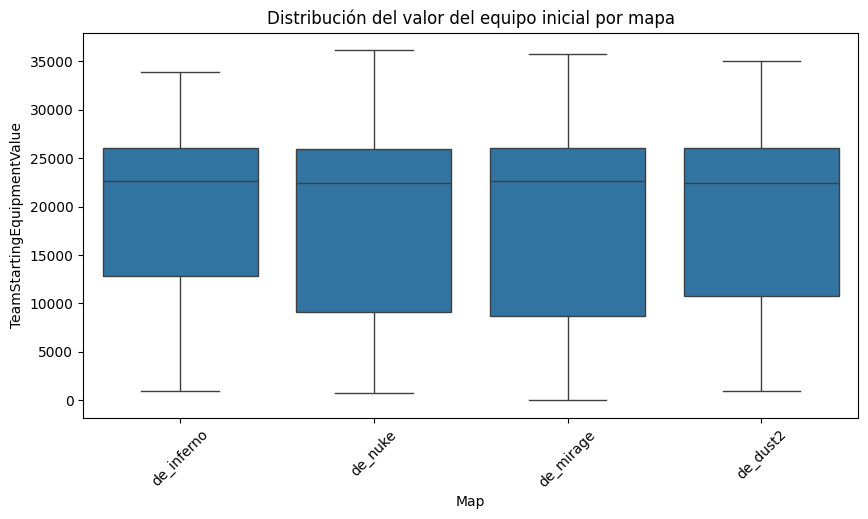

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='Map', y='TeamStartingEquipmentValue')
plt.title('Distribución del valor del equipo inicial por mapa')
plt.xticks(rotation=45)
plt.show()


Aquí se genera un mapa de calor (heatmap) que muestra la correlación entre todas las variables numéricas del dataset. La correlación indica qué tan relacionadas están dos variables, con valores que van de -1 (relación negativa fuerte) a 1 (relación positiva fuerte). El color representa la intensidad de esa relación: azul para correlaciones negativas, rojo para positivas y blanco para relaciones débiles o nulas.

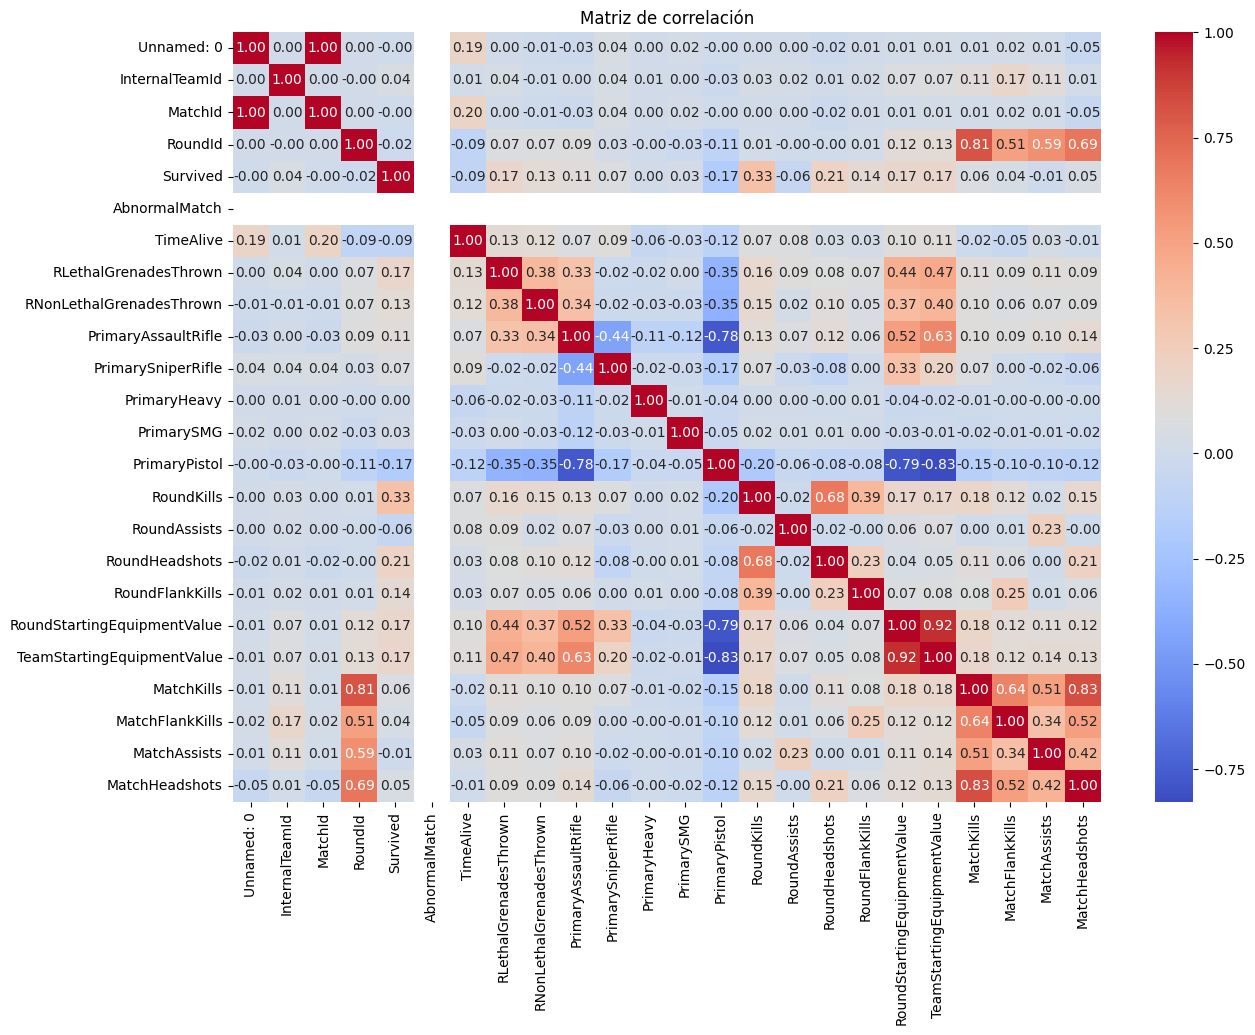

In [ ]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()


Este código genera un diagrama de caja (boxplot) que compara la distribución del valor del equipo inicial (RoundStartingEquipmentValue) entre los jugadores que sobrevivieron y los que no. En el eje X se muestran las dos categorías y en el eje Y el valor de su equipo inicial.

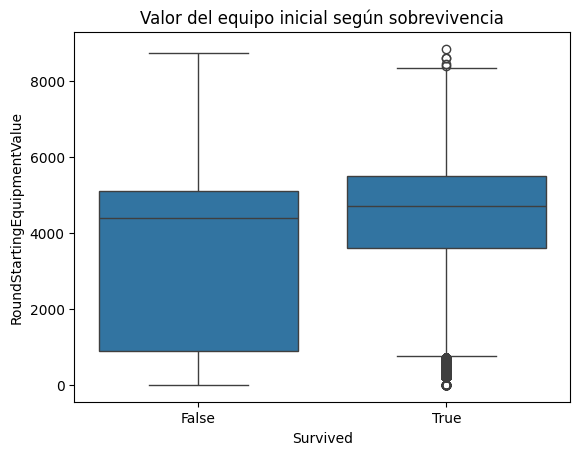

In [ ]:
sns.boxplot(data=df, x='Survived', y='RoundStartingEquipmentValue')
plt.title('Valor del equipo inicial según sobrevivencia')
plt.show()


Este boxplot compara el número de kills entre jugadores que sobrevivieron y los que no. Muestra la mediana, la dispersión y los valores atípicos de cada grupo, ayudando a ver si hacer más kills está relacionado con una mayor probabilidad de sobrevivir.

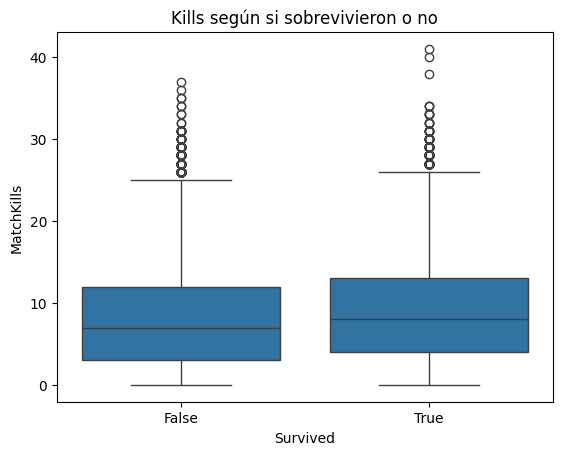

In [ ]:
sns.boxplot(data=df, x='Survived', y='MatchKills')
plt.title('Kills según si sobrevivieron o no')
plt.show()


Este código genera un gráfico de barras (countplot) que muestra la cantidad de jugadores que sobrevivieron y no sobrevivieron en cada mapa. El eje X presenta los mapas ordenados por frecuencia, y las barras están divididas por categorías de supervivencia. Este gráfico permite analizar si ciertos mapas favorecen más la supervivencia o, por el contrario, son más desafiantes para los jugadores.

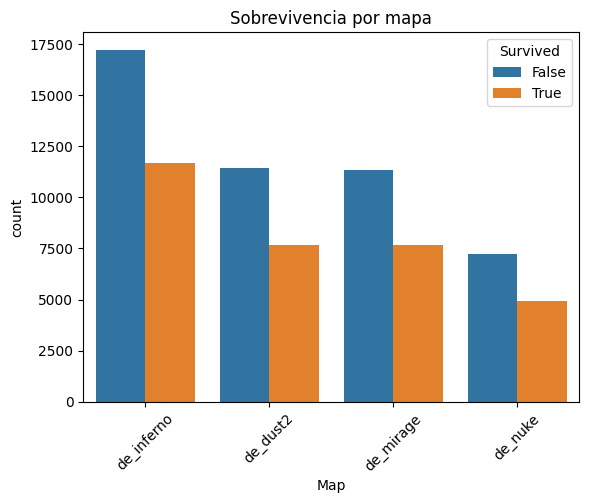

In [ ]:
sns.countplot(data=df, x='Map', hue='Survived', order=df['Map'].value_counts().index)
plt.title('Sobrevivencia por mapa')
plt.xticks(rotation=45)
plt.show()


Este es un gráfico de barras que muestra la cantidad de jugadores que sobrevivieron y no sobrevivieron en cada equipo. El eje X presenta los equipos, y las barras se dividen por categorías de supervivencia. Este gráfico permite identificar si algunos equipos tienen mayores tasas de supervivencia, lo que podría reflejar diferencias en habilidad, estrategia o desempeño durante las partidas.

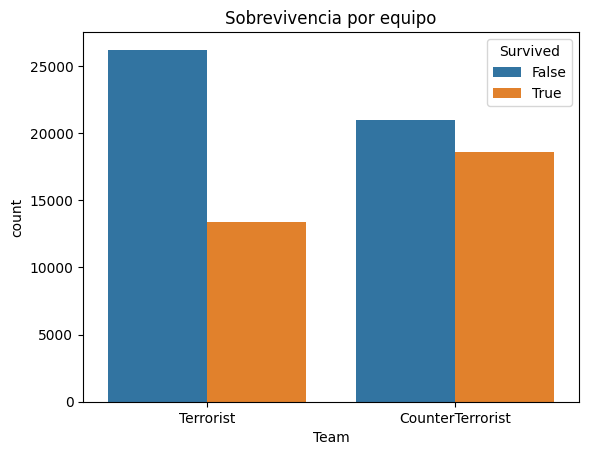

In [ ]:
sns.countplot(data=df, x='Team', hue='Survived')
plt.title('Sobrevivencia por equipo')
plt.show()


Aquí como se puede observar en el gráfico de dispersión (scatterplot) se muestra la relación entre el tiempo de vida (TimeAlive) y el número de headshots (MatchHeadshots) de los jugadores. Cada punto representa a un jugador, posicionándose según cuánto tiempo sobrevivió y cuántos headshots realizó. Este gráfico permite analizar si existe algún patrón o relación entre sobrevivir más tiempo y realizar más headshots durante las partidas.

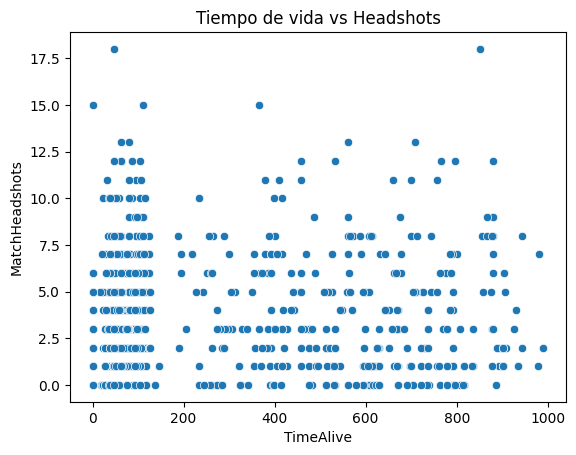

In [ ]:
sns.scatterplot(data=df, x='TimeAlive', y='MatchHeadshots')
plt.title('Tiempo de vida vs Headshots')
plt.show()


## Fase 3: Data Preparation

codigo para el de abajo


Filas originales: 79157
Filas sin outliers: 79157


<Axes: xlabel='Survived', ylabel='RoundStartingEquipmentValue'>

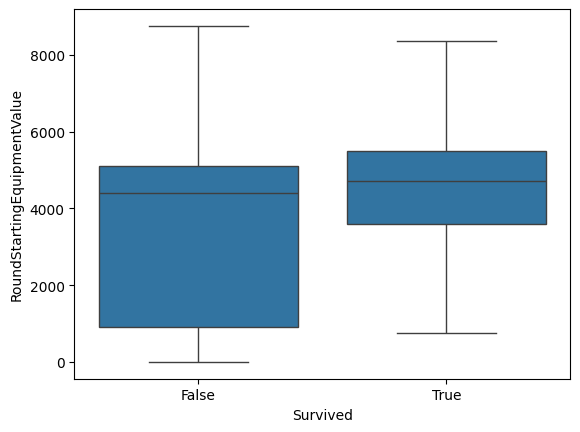

In [ ]:
# Insertar cuantos bloques de código consideren necesarios

# Se recomienda considerar todas las transformaciones necesarias para obtener la data lo más limpia posible.
# Realizar tratamiento a todos los datos que consideren necesarios.
# Copiar el DataFrame original
df_clean = df.copy()

# Calcular IQR
Q1 = df_clean['RoundStartingEquipmentValue'].quantile(0.25)
Q3 = df_clean['RoundStartingEquipmentValue'].quantile(0.75)
IQR = Q3 - Q1

# Definir límites
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar datos sin outliers
df_clean = df_clean[
    (df_clean['RoundStartingEquipmentValue'] >= lower_bound) &
    (df_clean['RoundStartingEquipmentValue'] <= upper_bound)
]

print(f"Filas originales: {len(df)}")
print(f"Filas sin outliers: {len(df_clean)}")
sns.boxplot(data=df_clean, x='Survived', y='RoundStartingEquipmentValue', showfliers=False)




abajo

In [ ]:
df_copy = df.copy()

df_copy['TimeAlive'] = pd.to_numeric(df_copy['TimeAlive'], errors='coerce')
df_copy['MatchHeadshots'] = pd.to_numeric(df_copy['MatchHeadshots'], errors='coerce')

corr = df_copy[['TimeAlive', 'MatchHeadshots']].corr()
print(corr)


                TimeAlive  MatchHeadshots
TimeAlive        1.000000       -0.006032
MatchHeadshots  -0.006032        1.000000


El análisis de "Tiempo de vida vs Headshots" muestra un valor de correlación cercano a 0, lo que indica que no existe una relación lineal entre cuánto tiempo permanece vivo un jugador y la cantidad de headshots que realiza. No hay una tendencia positiva ni negativa clara, esto quiere decir que no hay conexión entre estos datos


Filas originales: 79157
Filas sin outliers: 78995


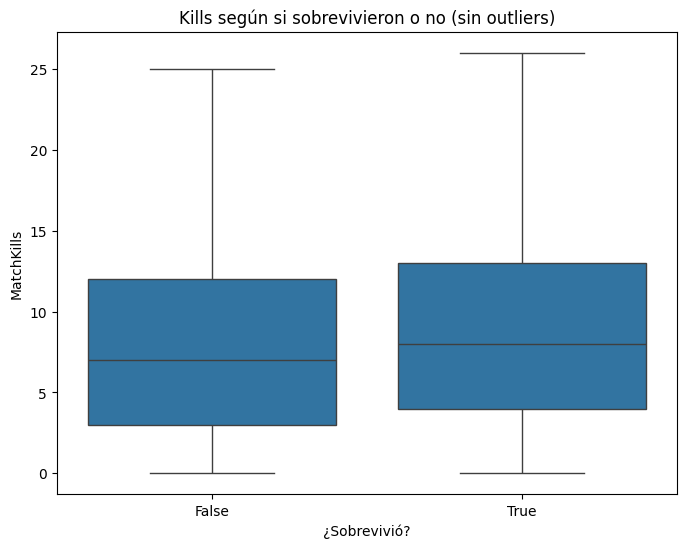

In [ ]:
# Copiar el DataFrame original
df_clean = df.copy()

# Calcular IQR para MatchKills
Q1 = df_clean['MatchKills'].quantile(0.25)
Q3 = df_clean['MatchKills'].quantile(0.75)
IQR = Q3 - Q1

# Definir límites
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar datos sin outliers
df_clean = df_clean[
    (df_clean['MatchKills'] >= lower_bound) &
    (df_clean['MatchKills'] <= upper_bound)
]

# Mostrar conteo de filas y gráfico
print(f"Filas originales: {len(df)}")
print(f"Filas sin outliers: {len(df_clean)}")

# Boxplot sin puntos atípicos visuales
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.boxplot(data=df_clean, x='Survived', y='MatchKills', showfliers=False)
plt.title('Kills según si sobrevivieron o no (sin outliers)')
plt.xlabel('¿Sobrevivió?')
plt.ylabel('MatchKills')
plt.show()


Este boxplot ayuda a visualizar cómo se distribuyen las kills entre los diferentes grupos (sobrevivientes y no sobrevivientes) y a entender mejor si hay una relación evidente entre hacer más kills y sobrevivir en el juego, sin la influencia de valores atípicos que podrían desvirtuar la comparación.



### Limpieza general

In [ ]:
# Copiar el DataFrame original
df_clean = df.copy()

# Eliminar valores nulos en 'TimeAlive' si no se pueden convertir
df_clean['TimeAlive'] = pd.to_numeric(df_clean['TimeAlive'], errors='coerce')
df_clean = df_clean[df_clean['TimeAlive'].notnull()]


In [ ]:
df_clean['WeaponType'] = df_clean[[
    'PrimaryAssaultRifle', 'PrimarySniperRifle', 'PrimaryHeavy',
    'PrimarySMG', 'PrimaryPistol'
]].idxmax(axis=1)


In [ ]:
Q1 = df_clean['RoundStartingEquipmentValue'].quantile(0.25)
Q3 = df_clean['RoundStartingEquipmentValue'].quantile(0.75)
IQR = Q3 - Q1
df_clean = df_clean[
    (df_clean['RoundStartingEquipmentValue'] >= Q1 - 1.5 * IQR) &
    (df_clean['RoundStartingEquipmentValue'] <= Q3 + 1.5 * IQR)
]


In [ ]:
for col in df_clean.columns:
    if df_clean[col].dtype == 'float64':
        df_clean[col] = df_clean[col].fillna(0).astype(int)
    elif df_clean[col].dtype == 'object':
        try:
            df_clean[col] = pd.to_numeric(df_clean[col], errors='raise').fillna(0).astype(int)
        except:
            pass


In [ ]:
df = df.drop([976, 4887], errors='ignore')#limpieza de valores nulos
df.reset_index(drop=True, inplace=True)
df.to_csv("dataset_limpio.csv", index=False)


# Conclusión

Tras analizar detenidamente los datos del dataset entregado para la realización de esta evaluación, se puede concluir que la hipótesis uno hace sentido con respecto a la relación del valor del equipamiento con el tiempo de supervivencia, siendo fundamental contar con un buen inventario para sobrevivir más tiempo en el videojuego.

Por otra parte, es posible que en ciertos casos el arma inicial tenga relación con el desempeño del jugador, no obstante, en algunos casos la correlación no es tan fuerte, por lo cual no se puede afirmar totalmente esta hipótesis.

El valor y tipo de equipamiento inicial juega un papel importante en el desempeño del juego, sin embargo, estas no son las únicas variables que definen el progreso del jugador, pueden haber otros factores tales como estrategia, habilidad, entre otras.

## Modelo de clasificacion KNN

In [ ]:
!pip install imbalanced-learn

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Cargar CSV con separador correcto
df = pd.read_csv("Anexo ET_demo_round_traces_2022.csv", sep=";", on_bad_lines="skip")

# Limpiar valores problemáticos
df = df.drop([976, 4887], errors='ignore').reset_index(drop=True)

# Convertir 'Survived' a binario
df['Survived'] = df['Survived'].astype(str).str.lower().map({'true': 1, 'false': 0})

# Variables predictoras
armas = ['PrimaryAssaultRifle', 'PrimarySniperRifle', 'PrimaryHeavy', 'PrimarySMG', 'PrimaryPistol']
X = df[armas]
y = df['Survived']

# Eliminar nulos
X = X.dropna()
y = y.loc[X.index]

# Estandarizar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


/tmp/ipython-input-12-3001236559.py:6: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Anexo ET_demo_round_traces_2022.csv", sep=";", on_bad_lines="skip")


# KNN sin reduccion de dimensionalidad

/tmp/ipython-input-24-2947689825.py:6: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Anexo ET_demo_round_traces_2022.csv", sep=";", on_bad_lines="skip")


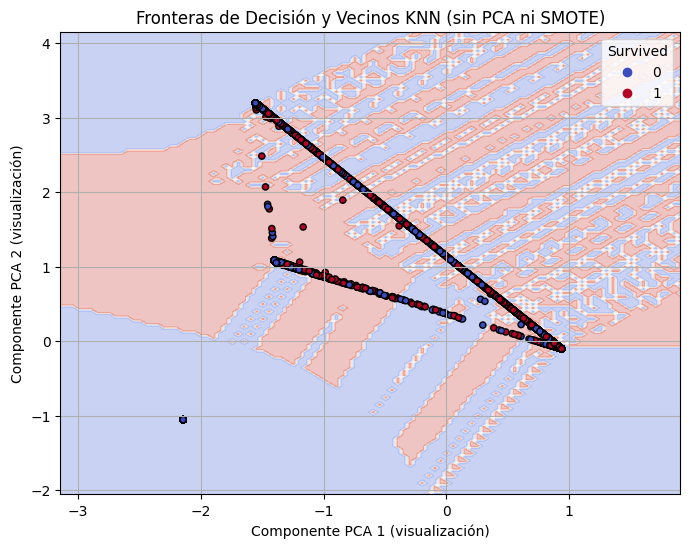

In [ ]:
----------------------------------from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
# Cargar dataset
df = pd.read_csv("Anexo ET_demo_round_traces_2022.csv", sep=";", on_bad_lines="skip")
df = df.drop([976, 4887], errors='ignore').reset_index(drop=True)
# Variable objetivo binaria
df['Survived'] = df['Survived'].astype(str).str.lower().map({'true': 1, 'false': 0})

# Variables predictoras (armas)
armas = ['PrimaryAssaultRifle', 'PrimarySniperRifle', 'PrimaryHeavy', 'PrimarySMG', 'PrimaryPistol']
X = df[armas].dropna()
y = df['Survived'].loc[X.index]

# Escalar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Entrenar modelo con datos originales
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Reducir solo para graficar (visualización, NO para entrenar)
pca = PCA(n_components=2)
X_proj = pca.fit_transform(X_scaled)

# Reentrenar solo para graficar
X_proj_train, X_proj_test, y_proj_train, y_proj_test = train_test_split(X_proj, y, test_size=0.3, random_state=42)
knn_plot = KNeighborsClassifier(n_neighbors=5)
knn_plot.fit(X_proj_train, y_proj_train)

# Crear malla para graficar fronteras
h = .05
x_min, x_max = X_proj[:, 0].min() - 1, X_proj[:, 0].max() + 1
y_min, y_max = X_proj[:, 1].min() - 1, X_proj[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn_plot.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Graficar
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap="coolwarm", alpha=0.3)
scatter = plt.scatter(X_proj[:, 0], X_proj[:, 1], c=y, cmap="coolwarm", edgecolor='k', s=20)
plt.title("Fronteras de Decisión y Vecinos KNN (sin PCA ni SMOTE)")
plt.xlabel("Componente PCA 1 (visualización)")
plt.ylabel("Componente PCA 2 (visualización)")
plt.grid(True)
plt.legend(*scatter.legend_elements(), title="Survived")
plt.show()

# Reduccion de diemnsionalidad y balanceo

In [ ]:
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

# Reducir dimensiones a 2 (PCA)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Aplicar SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_pca, y)

# Separar datos
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)


# Modelo KNN y Metricas BInarias

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Entrenar modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predicción
y_pred = knn.predict(X_test)
y_prob = knn.predict_proba(X_test)[:, 1]

# Métricas
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.66      0.30      0.41     14150
           1       0.55      0.84      0.66     14179

    accuracy                           0.57     28329
   macro avg       0.60      0.57      0.54     28329
weighted avg       0.60      0.57      0.54     28329



# Curva ROC

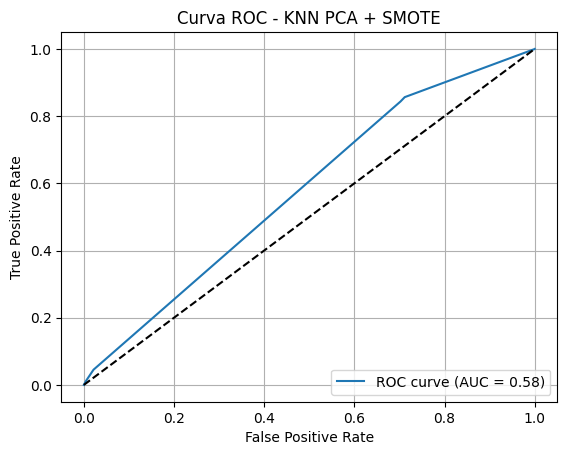

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC - KNN PCA + SMOTE")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


# Curva PR

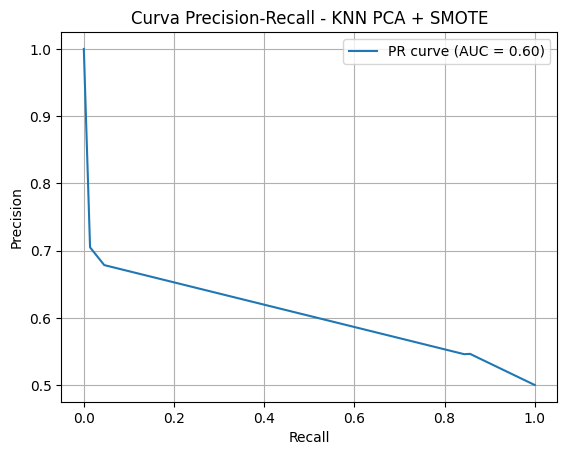

In [ ]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall, precision)

plt.figure()
plt.plot(recall, precision, label=f"PR curve (AUC = {pr_auc:.2f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Curva Precision-Recall - KNN PCA + SMOTE")
plt.legend(loc="upper right")
plt.grid(True)
plt.show()


# Matriz de confusion

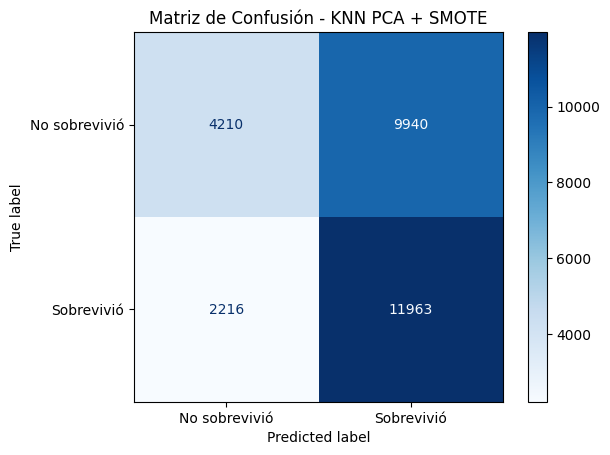

In [ ]:
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# PCA + SMOTE
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_pca, y)

# División
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Modelo
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No sobrevivió", "Sobrevivió"])
disp.plot(cmap="Blues")
plt.title("Matriz de Confusión - KNN PCA + SMOTE")
plt.grid(False)
plt.show()


# Vecinos mas cercanos


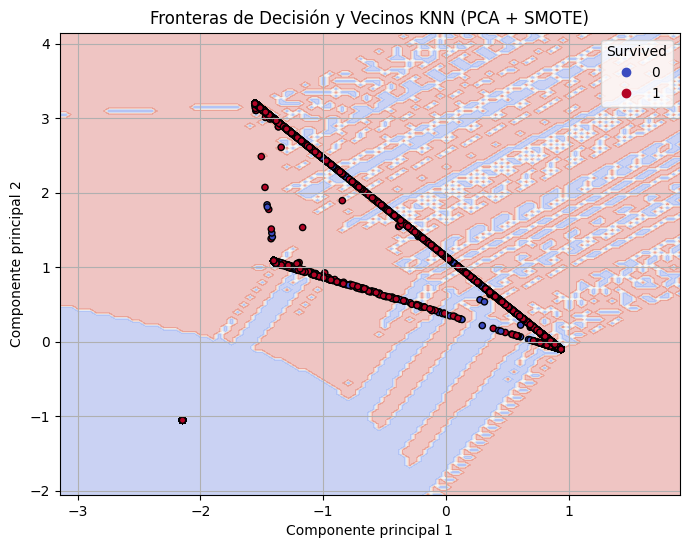

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# PCA + SMOTE
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_pca, y)

# División
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Modelo
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Malla para graficar frontera
h = .05
x_min, x_max = X_resampled[:, 0].min() - 1, X_resampled[:, 0].max() + 1
y_min, y_max = X_resampled[:, 1].min() - 1, X_resampled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Gráfico
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap="coolwarm", alpha=0.3)
scatter = plt.scatter(X_resampled[:, 0], X_resampled[:, 1], c=y_resampled, cmap="coolwarm", edgecolor='k', s=20)
plt.title("Fronteras de Decisión y Vecinos KNN (PCA + SMOTE)")
plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 2")
plt.grid(True)
plt.legend(*scatter.legend_elements(), title="Survived")
plt.show()


# Conclusion
 Hipótesis H2:
“El tipo de arma principal utilizada por un jugador influye en su probabilidad de sobrevivir en la partida.”

Evaluación del modelo KNN con PCA + SMOTE
Métricas binarias:

Métrica	Clase 0 (No sobrevivió)	Clase 1 (Sobrevivió)	Accuracy Global
Precision	0.66	0.55	0.57
Recall	0.30	0.84
F1-Score	0.41	0.66

El modelo mejora la detección de sobrevivientes (recall = 0.84), pero sacrifica precisión para la clase 0.

El uso de SMOTE balancea las clases y mejora la sensibilidad, especialmente para la clase minoritaria (Survived = 1).

Curvas ROC y PR
ROC AUC: 0.58 → desempeño moderado, apenas sobre el azar.

Precision-Recall AUC: 0.60 → muestra que hay potencial de mejora, pero el modelo sí encuentra ciertos patrones útiles.

Ambas curvas indican que el modelo detecta sobrevivientes mejor que al azar, pero con riesgo de falsos positivos.

Matriz de Confusión
Predijo 0	Predijo 1
Real 0	4.210	9.940
Real 1	2.216	11.963

El modelo tiende a sobrepredecir la clase 1 (supervivencia).

Esto es esperable con SMOTE, ya que aumenta la proporción de la clase minoritaria artificialmente.

Fronteras de Decisión
KNN con PCA + SMOTE:
Zonas rojas amplias indican alta predicción de supervivencia.

Muchos puntos azules (no sobrevivió) aparecen dentro de zonas rojas → indica sobreajuste leve o sobreoptimismo del modelo tras SMOTE.

KNN sin PCA ni SMOTE:
Zonas de decisión más ajustadas y conservadoras.

Menor presencia de clase 1 (rojo), lo que indica desbalance natural.

Menor recall pero más controlado (mejor precisión en clase 0).

Interpretación final
El modelo KNN, incluso en su versión básica, capta una relación entre el tipo de arma y la probabilidad de sobrevivir.

PCA + SMOTE permiten mejorar el recall (detectar más sobrevivientes), pero aumentan el riesgo de falsos positivos.

Los resultados apoyan parcialmente la hipótesis H2, pero dejan claro que el tipo de arma no es suficiente por sí solo para una clasificación precisa.


